# Descriptive Statistics

In [1]:
import pandas as pd
steam_ds = pd.read_csv("steam_games_cleaned.csv")

In [2]:
num_reviews = len(steam_ds)
num_games = steam_ds['game_name'].nunique()
num_users = steam_ds['username'].nunique()

print("Reviews:", num_reviews, "reviews.")
print("Games:", num_games, "different games.")
print("Users:", num_users, "different users.")
print()

print(steam_ds['hours_played'].describe())
print()
print(steam_ds['recommendation'].value_counts(normalize=True))
print()
print(steam_ds['playtime'].value_counts())

Reviews: 991568 reviews.
Games: 242 different games.
Users: 765193 different users.

count    991568.000000
mean        339.222821
std        1209.427800
min           0.000000
25%          18.900000
50%          59.600000
75%         208.400000
max      107075.100000
Name: hours_played, dtype: float64

recommendation
1    0.812105
0    0.187895
Name: proportion, dtype: float64

playtime
Moderate    463385
Heavy       309068
Casual      145421
Name: count, dtype: int64


# Engagement Analytics

In [3]:
playtime_recommend = steam_ds.groupby('recommendation')['hours_played'].mean()
print(playtime_recommend)

recommendation
0    316.235113
1    344.541450
Name: hours_played, dtype: float64


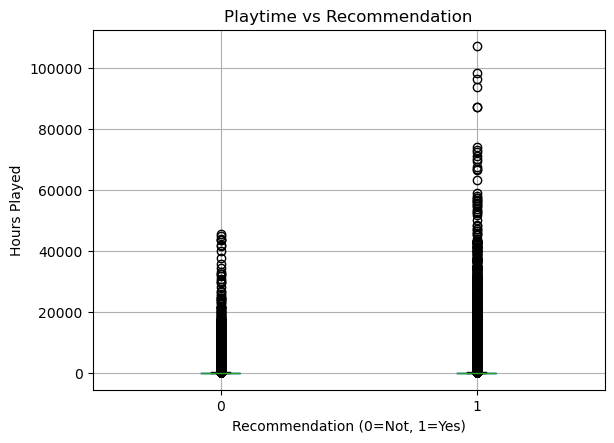

In [4]:
import matplotlib.pyplot as plt

steam_ds.boxplot(column='hours_played', by='recommendation')
plt.title('Playtime vs Recommendation')
plt.suptitle('')
plt.xlabel('Recommendation (0=Not, 1=Yes)')
plt.ylabel('Hours Played')
plt.show()

Key Takeaways:
- Median playtime is higher among players who recommended the game compared to those who did not.
- This suggests that satisfaction grows with investment — players who spend more time are more likely to leave positive reviews.
- The distribution for recommended games is wider, showing more variability in how long satisfied players engage.
- Outliers exist in both groups (extremely high playtime), but they don’t change the overall trend: more hours → higher chance of recommendation.

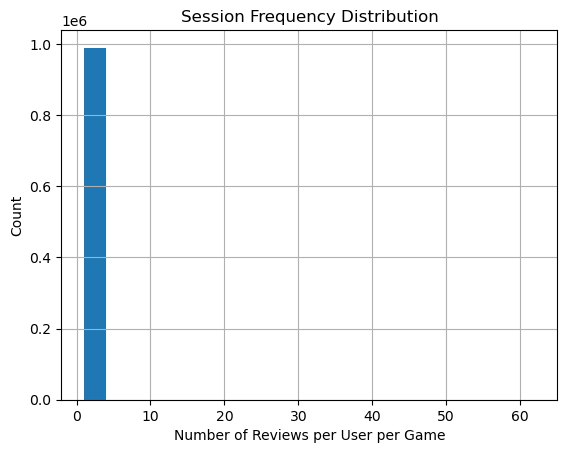

In [5]:
session_freq = steam_ds.groupby(['username', 'game_name']).size().reset_index(name='review_count')

session_freq['review_count'].hist(bins=20)
plt.title('Session Frequency Distribution')
plt.xlabel('Number of Reviews per User per Game')
plt.ylabel('Count')
plt.show()

### Key Takeaways:
- The overwhelming majority of users leave only one review per game.
- This confirms that Steam reviews are typically a one‑time expression of sentiment, not ongoing feedback.
- Very few users contribute multiple reviews for the same game — these outliers may represent superfans or players whose opinions evolved over time.
- The skewed distribution itself is meaningful: it highlights the simplicity and consistency of user behavior in review activity.

### Combined Insight
- Playtime is a strong driver of satisfaction (more hours → more recommendations).
- Review frequency is low, meaning most players express their opinion once, so each review carries weight.
- For developers and analysts, this means focusing on playtime thresholds and first impressions is crucial: players rarely update their reviews, so early engagement matters.